In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas, plot_stat_map
from nilearn.image import iter_img

In [65]:
func_filenames = [
    'vol_0_1_maths.nii.gz'
]

In [66]:
canica = CanICA(
    n_components=10,
    memory='nilearn_cache',
    memory_level=2,
    verbose=10,
    mask_strategy='whole-brain-template',
    random_state=0,
    standardize='zscore_sample',
)
canica.fit(func_filenames)

[MultiNiftiMasker.fit] Loading data from [vol_0_1_maths.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
Template whole-brain mask computation
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001469],
       ...,
       [0.001953]], dtype=float32), n_components=10, transpose=True, random_state=0, n_iter=3)
_________________________________________

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.3s


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001469],
       ...,
       [0.001953]]), whiten='arbitrary-variance', fun='cube', random_state=1478610112)
__________________________________________________________fastica - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001469],
       ...,
       [0.001953]]), whiten='arbitrary-variance', fun='cube', random_state=441365315)
__________________________________________________________fastica - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001469],
       ...,
       [0.001953]]), whiten='arbitrary-variance', fun='cube', random_state=1537364731)
_________________________________________

[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.5s


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001469],
       ...,
       [0.001953]]), whiten='arbitrary-variance', fun='cube', random_state=530702035)
__________________________________________________________fastica - 0.1s, 0.0min


CanICA(mask_strategy='whole-brain-template',
       memory=Memory(location=nilearn_cache/joblib), memory_level=2,
       n_components=10, random_state=0, standardize='zscore_sample',
       verbose=10)

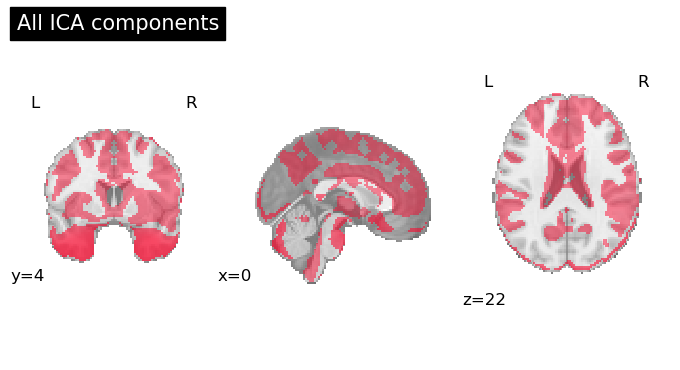

In [67]:
plot_prob_atlas(canica.components_img_, title='All ICA components', draw_cross=False)
plt.show()

In [68]:
print('Total explained variance:', canica.score(canica.components_img_))

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.decomposition._base._explained_variance...
_explained_variance(array([[ 3.101459e-04, ..., -6.242102e-05]], dtype=float32), array([[0.002192, ..., 0.000414]], dtype=float32), per_component=False)
_______________________________________________explained_variance - 0.0s, 0.0min
Total explained variance: 0.9333929094417885


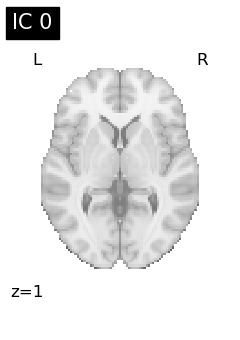

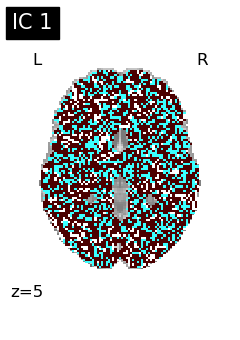

In [58]:
for i, cur_img in enumerate(iter_img(canica.components_img_)):
    plot_stat_map(cur_img, display_mode='z', title=f'IC {int(i)}', cut_coords=1, colorbar=False)

In [8]:
canica.components_img_.to_filename('ica_components.nii.gz')

## Analysis of images belonging to the same assessed risk value

In [1]:
import pandas as pd
events = pd.read_csv('sub-01_task-mixedgamblestask_run-01_events.tsv', sep='\t')
events.head()


,onset,duration,parametric loss,distance from indifference,parametric gain,gain,loss,PTval,respnum,respcat,response_time
0,0.0,3,0.1273,-0.0814,-0.139,20,15,5.15,0,-1,0.000
1,4.0,3,-0.0227,-0.4147,-0.189,18,12,6.12,2,1,1.793
2,8.0,3,0.1273,0.2519,-0.389,10,15,-4.85,3,0,1.637
3,18.0,3,0.1773,-0.0814,0.211,34,16,18.16,1,1,1.316
4,24.0,3,-0.3727,-0.0814,-0.189,18,5,13.05,1,1,1.670


In [2]:
# events where subjective loss was the largest
# 0 = strongly accept, 4- strongly reject
onsets = events[events['respnum'] == 4]
onsets.head()

,onset,duration,parametric loss,distance from indifference,parametric gain,gain,loss,PTval,respnum,respcat,response_time
12,74.0,3,0.2273,0.5853,-0.289,14,17,-2.83,4,0,1.822
14,82.0,3,0.3773,0.5853,-0.289,14,20,-5.80,4,0,1.206
26,134.0,3,0.3773,0.5853,-0.239,16,20,-3.80,4,0,1.047
29,156.0,3,0.1273,0.2519,-0.339,12,15,-2.85,4,0,1.082
59,342.0,3,-0.0727,-0.0814,-0.389,10,11,-0.89,4,0,1.806


In [3]:
onsets = onsets['onset'].values.tolist()
onsets

[74.0, 82.0, 134.0, 156.0, 342.0, 346.0, 386.0, 402.0, 458.0]

In [4]:
from preprocess import *
merge_files_based_on_timestamps(onsets)


FileNotFoundError: [Errno 2] No such file or directory: 'timestamp_filename.json'